# P06: Goodness-of-fit and hypothesis testing

## Problem 1: Fitting stellar luminosities

Let us assume that we measure the luminosity as a function of time for four samples of stars. Each sample contains 100 stars and we measure their luminosity at 50 times each. The recorded values for the stellar luminosities for four samples are in the `data` directory and designated `starcat_1.npy`, `starcat_2.npy`, `starcat_3.npy` and `starcat_4.npy`. The values are given in units of $L_\odot$.

Our hypothesis is that all stars in these four catalogs are non-variable, i.e. their luminosity does not vary as a function of time, and that the observed luminosities are normally distributed with a standard deviation of $\sigma(L_*)=0.1L_*$.

(i) Test if the data is consistent with this hypothesis by comparing the data to model predictions and computing the $\chi^2$ values of the observed data with respect to the assumed model.


(ii) Try to diagnose the reasons for the discrepancies found (if any).

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from pathlib import Path
import scipy.stats
from scipy.optimize import curve_fit

In [63]:
# Load the .npy file
catalog_1 = np.load("./data/starcat_1.npy")
catalog_2 = np.load("./data/starcat_2.npy")
catalog_3 = np.load("./data/starcat_3.npy")
catalog_4 = np.load("./data/starcat_4.npy")
catalog_1.shape

(100, 50)

First, lets compute the $\chi^2, \sigma_{data}, \mu, median$ values for each star in the catalogs. The last three quantities to compare in the following cells. We will keep the catalogs independent in order to detect more easily possible inconsistencies.

In [64]:
X_cat1, X_cat2, X_cat3, X_cat4 = [],[],[],[]
s_cat1, s_cat2, s_cat3, s_cat4  = [],[],[],[]
mean_cat1, mean_cat2, mean_cat3, mean_cat4  =[],[],[],[]
median_cat1, median_cat2, median_cat3, median_cat4  =[],[],[],[]

for star in range(100):
    for L in range(50):
        mu = np.mean(catalog_1[star])
        sigma= 0.1*mu
        chi_squared = np.sum((catalog_1[star][L] - mu)**2 / sigma**2)
    mean_cat1.append(np.mean(catalog_1[star]))
    median_cat1.append(np.median(catalog_1[star]))
    s_cat1.append(np.std(catalog_1[star]))  
    X_cat1.append(chi_squared)
X_cat1 = np.array(X_cat1)
s_cat1= np.array(s_cat1)
mean_cat1 = np.array(mean_cat1)

for star in range(100):
    for L in range(50):
        mu = np.mean(catalog_2[star])
        sigma= 0.1*mu
        chi_squared = np.sum((catalog_2[star][L] - mu)**2 / sigma**2)
    mean_cat2.append(np.mean(catalog_2[star]))
    median_cat2.append(np.median(catalog_2[star]))
    s_cat2.append(np.std(catalog_2[star]))      
    X_cat2.append(chi_squared)
X_cat2 = np.array(X_cat2)
s_cat2= np.array(s_cat2)
mean_cat2 = np.array(mean_cat2)

for star in range(100):
    for L in range(50):
        mu = np.mean(catalog_3[star])
        sigma= 0.1*mu
        chi_squared = np.sum((catalog_3[star][L] - mu)**2 / sigma**2)
    mean_cat3.append(np.mean(catalog_3[star]))
    median_cat3.append(np.median(catalog_3[star]))
    s_cat3.append(np.std(catalog_3[star]))      
    X_cat3.append(chi_squared)
X_cat3 = np.array(X_cat3)
s_cat3= np.array(s_cat3)
mean_cat3 = np.array(mean_cat3)

for star in range(100):
    for L in range(50):
        mu = np.mean(catalog_4[star])
        sigma= 0.1*mu
        chi_squared= np.sum((catalog_4[star][L] - mu)**2 / sigma**2)
    mean_cat4.append(np.mean(catalog_4[star]))
    median_cat4.append(np.median(catalog_4[star]))
    s_cat4.append(np.std(catalog_4[star]))      
    X_cat4.append(chi_squared)
X_cat4 = np.array(X_cat4)
s_cat4= np.array(s_cat4)
mean_cat4 = np.array(mean_cat4)

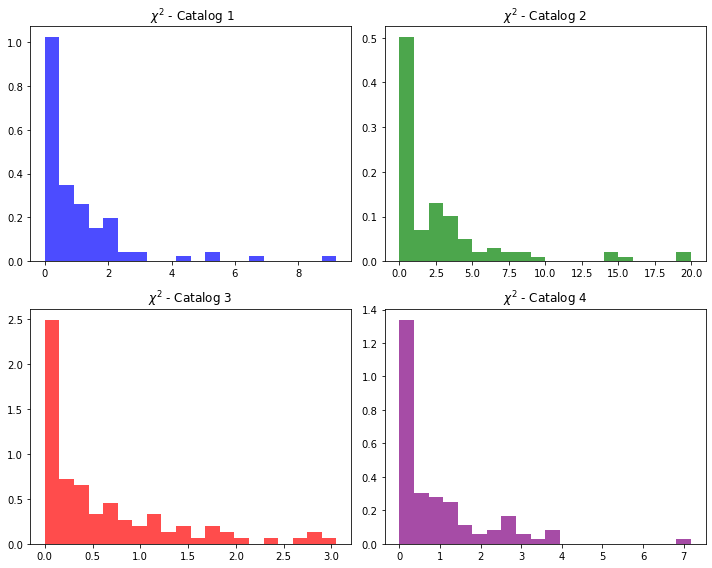

In [65]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

axes[0, 0].hist(X_cat1, bins=20, color='blue', alpha=0.7, density = True, )
# Overlaying the expected normal distribution
axes[0, 0].set_title(r" $\chi^2$ - Catalog 1")

axes[0, 1].hist(X_cat2, bins=20, color='green', alpha=0.7, density = True)
axes[0, 1].set_title(r"$\chi^2$ - Catalog 2 ")

axes[1, 0].hist(X_cat3, bins=20, color='red', alpha=0.7, density = True)
axes[1, 0].set_title(r"$\chi^2$ - Catalog 3 ")

axes[1, 1].hist(X_cat4, bins=20, color='purple', alpha=0.7, density = True)
axes[1, 1].set_title(r"$\chi^2$ - Catalog 4 ")

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

It is clear that we have a hight count per catalog at $\chi^2 = 0$, some reasons for this can be:
* $Residual= L_i- \mu \approx 0$. (Good agreement between the observed data and the mean, indicating low variability).
* The model for the errors is not correct.

If the individual distributions are Gaussians, then the upper plots should follow the $\chi^2$ distribution. However, by simple inspection we can point that a peak so close to zero, would indicate a $\chi^2$ distruibution with very small degrees of freedom (which we think is not correct, since at least we have 50 data point for each star, and we estimated just 1 parameter (the mean)).

We performed some comparisons between the "assumed" model and the actual data. For a Gaussian, we know that the mean and the median should converge. 

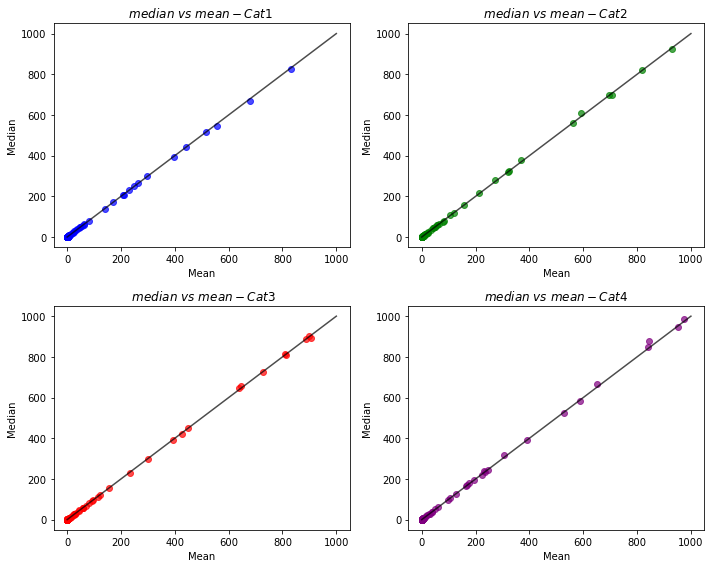

In [66]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

x = np.linspace(0,1000,100)
axes[0, 0].scatter(mean_cat1,median_cat1, color='blue', alpha=0.7)
axes[0, 0].set_xlabel("Mean")
axes[0, 0].set_ylabel("Median")
axes[0, 0].plot(x,x , color='k', alpha=0.7)
axes[0, 0].set_title(r" $median \ vs \ mean- Cat 1$  ")

axes[0, 1].scatter(mean_cat2,median_cat2, color='green', alpha=0.7)
axes[0, 1].plot(x,x , color='k', alpha=0.7)
axes[0, 1].set_title(r" $median \ vs \ mean- Cat 2 $  ")
axes[0, 1].set_xlabel("Mean")
axes[0, 1].set_ylabel("Median")

axes[1, 0].scatter(mean_cat3,median_cat3, color='red', alpha=0.7)
axes[1, 0].plot(x,x , color='k', alpha=0.7)
axes[1, 0].set_title(r" $median \ vs \ mean- Cat 3  $")
axes[1, 0].set_xlabel("Mean")
axes[1, 0].set_ylabel("Median")

axes[1, 1].scatter(mean_cat4,median_cat4, color='purple', alpha=0.7)
axes[1, 1].plot(x,x , color='k', alpha=0.7)
axes[1, 1].set_title(r"$median \ vs \ mean- Cat 4$ ")
axes[1, 1].set_xlabel("Mean")
axes[1, 1].set_ylabel("Median")

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

From this plots, we can say that the values of each star are roughly around a central value for every sample. We can also observe, that there is a high accumulation of points on the low luminosity portion of the plots. We also compared the given $\sigma_{model}$ with the $\sigma_{data}$.

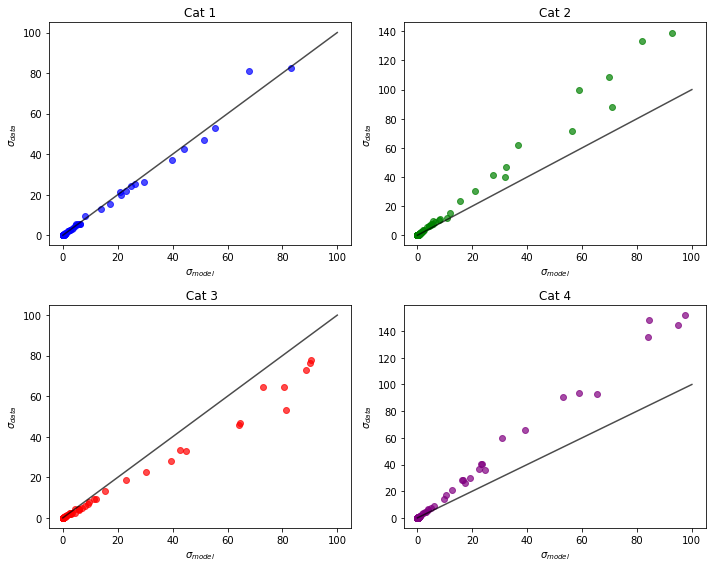

In [67]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

x = np.linspace(0,100,100)
axes[0, 0].scatter(0.1*mean_cat1,s_cat1 , color='blue', alpha=0.7)
axes[0, 0].set_xlabel("$\sigma_{model}$")
axes[0, 0].set_ylabel("$\sigma_{data}$")
axes[0, 0].plot(x,x , color='k', alpha=0.7)
axes[0, 0].set_title("Cat 1")

axes[0, 1].scatter(0.1*mean_cat2,s_cat2 , color='green', alpha=0.7)
axes[0, 1].plot(x,x , color='k', alpha=0.7)
axes[0, 1].set_title("Cat 2")
axes[0, 1].set_xlabel("$\sigma_{model}$")
axes[0, 1].set_ylabel("$\sigma_{data}$")

axes[1, 0].scatter(0.1*mean_cat3,s_cat3 , color='red', alpha=0.7)
axes[1, 0].plot(x,x , color='k', alpha=0.7)
axes[1, 0].set_title(" Cat 3")
axes[1, 0].set_xlabel("$\sigma_{model}$")
axes[1, 0].set_ylabel("$\sigma_{data}$")

axes[1, 1].scatter(0.1*mean_cat4,s_cat4 , color='purple', alpha=0.7)
axes[1, 1].plot(x,x , color='k', alpha=0.7)
axes[1, 1].set_title("Cat 4")
axes[1, 1].set_xlabel("$\sigma_{model}$")
axes[1, 1].set_ylabel("$\sigma_{data}$")

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

In this plot we see some inconsistencies between the model for the errors and the deviation of the data. For high luminosities the dispersion is evident. For catalog 2 and 4 the error model underestimates the deviations of the samples, while for catalog 3 it overestimates the deviations. Catalog 1, exhibit moderate dispersion.

Conclusions:
* The most evident inconsistency founded is that the errors model seems to don't be correct one (at least for every catalog).
* The underlying distribution seems to be "symmetric" since the median and mean values converges.
* The distribution of the $\chi^2$ values seems to don't follow the expected $\chi^2$ distributions associated with the degrees of freedoms (skewed to the right distribution).
* By looking at the data, an hypothesis that emerges is that some of the high luminosity stars may be variable stars or don't follow the same underlying distribution of the low luminosity stars.


## Problem 2: Magnitude distributions and colors

Use `astropy.io.fits` to load the six fits files called `magnitudes0.fits` to `magnitudes5.fits`. Find out how to extract the magnitudes of the galaxies in each of the files in $g$, $r$, and $i$ bands. Write a function that takes the fits object and returns the colors:
$$C_1 =  \mathrm{mag}_g - \mathrm{mag}_r$$
$$C_2 =  \mathrm{mag}_i - \mathrm{mag}_r$$
Plot histograms of the colors and the color-color plane of each of the catalogs. 

Can you spot the non-consistent catalogs by eye?

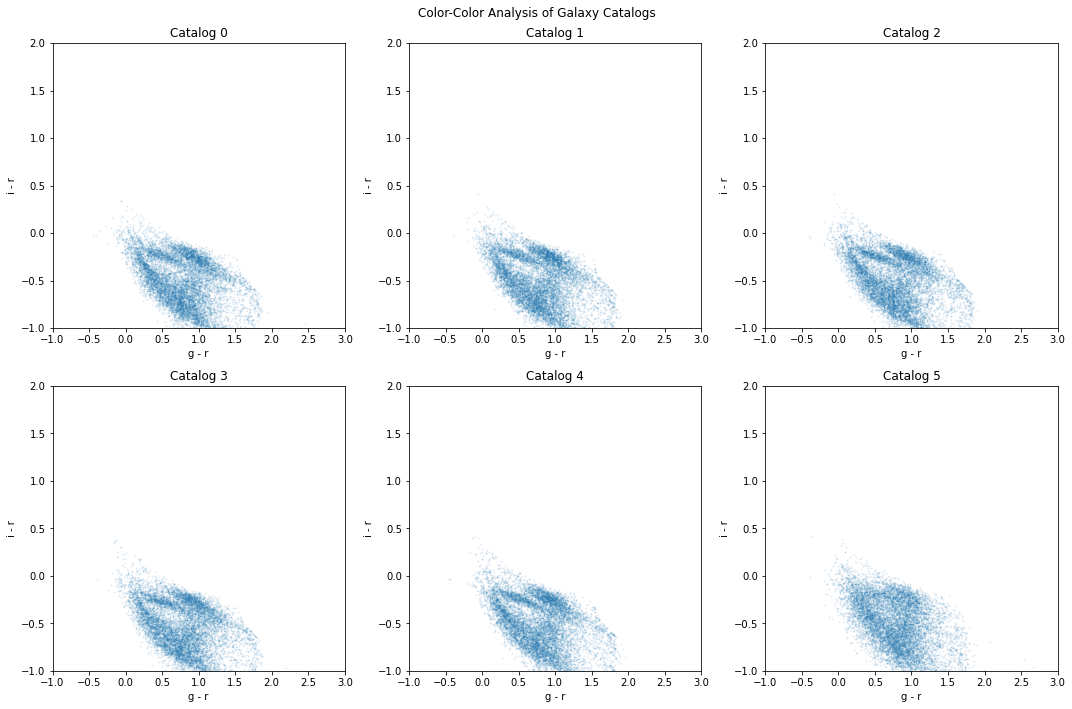

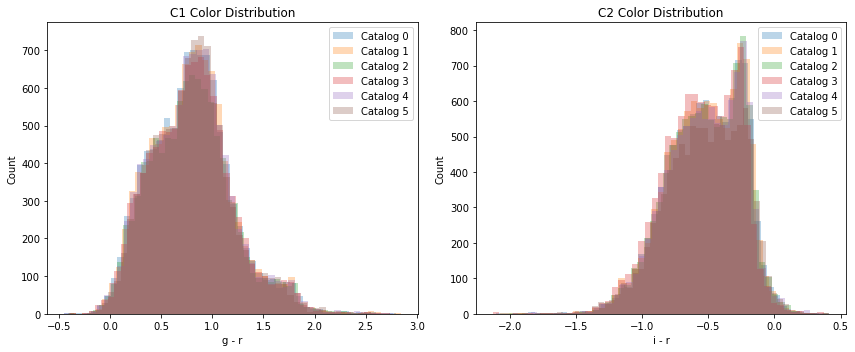

In [68]:
def get_colors(fits_data):
    """Extract colors C1 (g-r) and C2 (i-r) from magnitude data"""
    # Using the correct column names from the FITS files
    mag_g = fits_data['G MAG'][:]
    mag_r = fits_data['R MAG'][:]
    mag_i = fits_data['I MAG'][:]
    
    c1 = mag_g - mag_r  # g-r color
    c2 = mag_i - mag_r  # i-r color
    
    return c1, c2

def analyze_catalogs():
    # Create paths for the six magnitude files
    data_dir = Path('data')
    paths = [data_dir / f'magnitudes{i}.fits' for i in range(6)]
    
    # Load all catalogs
    catalogs = []
    for path in paths:
        with fits.open(path) as hdul:
            catalogs.append(hdul[1].data)  # Data is in the first extension
    
    # Create figure with subplots for color-color plots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Color-Color Analysis of Galaxy Catalogs')
    
    # Plot color-color diagram for each catalog
    for idx, data in enumerate(catalogs):
        c1, c2 = get_colors(data)
        row, col = idx // 3, idx % 3
        ax = axes[row, col]
        
        scatter = ax.scatter(c1, c2, alpha=0.1, s=1)
        ax.set_xlabel('g - r')
        ax.set_ylabel('i - r')
        ax.set_title(f'Catalog {idx}')
        
        # Set consistent axis limits
        ax.set_xlim(-1, 3)
        ax.set_ylim(-1, 2)
    
    plt.tight_layout()
    plt.show()
    
    # Create histogram plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    for idx, data in enumerate(catalogs):
        c1, c2 = get_colors(data)
        ax1.hist(c1, bins=50, alpha=0.3, label=f'Catalog {idx}')
        ax2.hist(c2, bins=50, alpha=0.3, label=f'Catalog {idx}')
    
    ax1.set_xlabel('g - r')
    ax1.set_ylabel('Count')
    ax1.set_title('C1 Color Distribution')
    ax1.legend()
    
    ax2.set_xlabel('i - r')
    ax2.set_ylabel('Count')
    ax2.set_title('C2 Color Distribution')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    analyze_catalogs()

## Problem 3: T-test

Use the t-test (from `scipy.stats.ttest_ind`, for example) to compare both $C_1$ and $C_2$ between the different catalogs. 

Which catalogs are non-consistent with 95% confidence? 

## Problem 4: KS-test

Use the KS-test (from `scipy.stats.ks_2samp`, for example) to compare both $C_1$ and $C_2$ between the different catalogs. 

(i) Which catalogs are non-consistent with 95% confidence? 

(ii) How do you explain the discrepancies between findings of problem 3 and 4?